In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
42,15772798,Male,35,108000,0
141,15666141,Female,18,68000,0
51,15764195,Female,18,44000,0
16,15733883,Male,47,25000,1
151,15576219,Male,41,45000,0


In [4]:
df.iloc[:,2:]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df = pd.get_dummies(df, columns=['Gender'])

In [6]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                df['Purchased'],
                                                 test_size = 0.2,
                                                random_state = 0)

In [7]:
x_train.sample(3)

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
159,15598840,32,135000,True,False
256,15609637,41,72000,True,False
142,15617134,35,59000,False,True


In [8]:
y_train.sample(3)

275    1
390    1
279    1
Name: Purchased, dtype: int64

## Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(x_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [13]:
scaler.mean_

array([1.56912015e+07, 3.82187500e+01, 6.99281250e+04, 5.12500000e-01,
       4.87500000e-01])

In [14]:
x_train

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
336,15664907,58,144000,False,True
64,15605000,59,83000,True,False
55,15649136,24,55000,True,False
106,15706185,26,35000,True,False
300,15736397,58,38000,True,False
...,...,...,...,...,...
323,15619465,48,30000,True,False
192,15779581,29,43000,False,True
117,15591433,36,52000,False,True
47,15776348,27,54000,True,False


In [15]:
X_train_scaled

array([[-0.37311852,  1.92295008,  2.14601566, -1.02532046,  1.02532046],
       [-1.22319878,  2.02016082,  0.3787193 ,  0.97530483, -0.97530483],
       [-0.596909  , -1.3822153 , -0.4324987 ,  0.97530483, -0.97530483],
       ...,
       [-1.4157145 , -0.21568634, -0.51941492, -1.02532046,  1.02532046],
       [ 1.20822913, -1.09058306, -0.46147078,  0.97530483, -0.97530483],
       [ 1.46809058, -1.18779381,  1.3927418 ,  0.97530483, -0.97530483]])

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = x_train.columns)

In [17]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns = x_test.columns)

In [18]:
X_test_scaled

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,0.488966,-0.798951,0.494608,-1.025320,1.025320
1,-0.550593,-0.021265,-0.577359,0.975305,-0.975305
2,1.215267,-0.312897,0.146943,-1.025320,1.025320
3,0.670428,-0.798951,0.262831,0.975305,-0.975305
4,-0.754886,-0.312897,-0.577359,0.975305,-0.975305
...,...,...,...,...,...
75,-0.883036,-1.965480,0.349747,-1.025320,1.025320
76,1.093929,0.367578,0.262831,0.975305,-0.975305
77,-1.321535,0.173157,-0.287638,0.975305,-0.975305
78,1.243449,1.436896,-1.040912,0.975305,-0.975305


In [19]:
np.round(X_train_scaled.describe(),1)

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
count,320.0,320.0,320.0,320.0,320.0
mean,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.7,-2.0,-1.6,-1.0,-1.0
25%,-0.9,-0.8,-0.8,-1.0,-1.0
50%,0.0,-0.0,-0.0,1.0,-1.0
75%,0.8,0.8,0.5,1.0,1.0
max,1.8,2.1,2.3,1.0,1.0


In [20]:
np.round(X_train_scaled.describe(),1)

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
count,320.0,320.0,320.0,320.0,320.0
mean,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.7,-2.0,-1.6,-1.0,-1.0
25%,-0.9,-0.8,-0.8,-1.0,-1.0
50%,0.0,-0.0,-0.0,1.0,-1.0
75%,0.8,0.8,0.5,1.0,1.0
max,1.8,2.1,2.3,1.0,1.0


## if you want to check the effect of scaling 

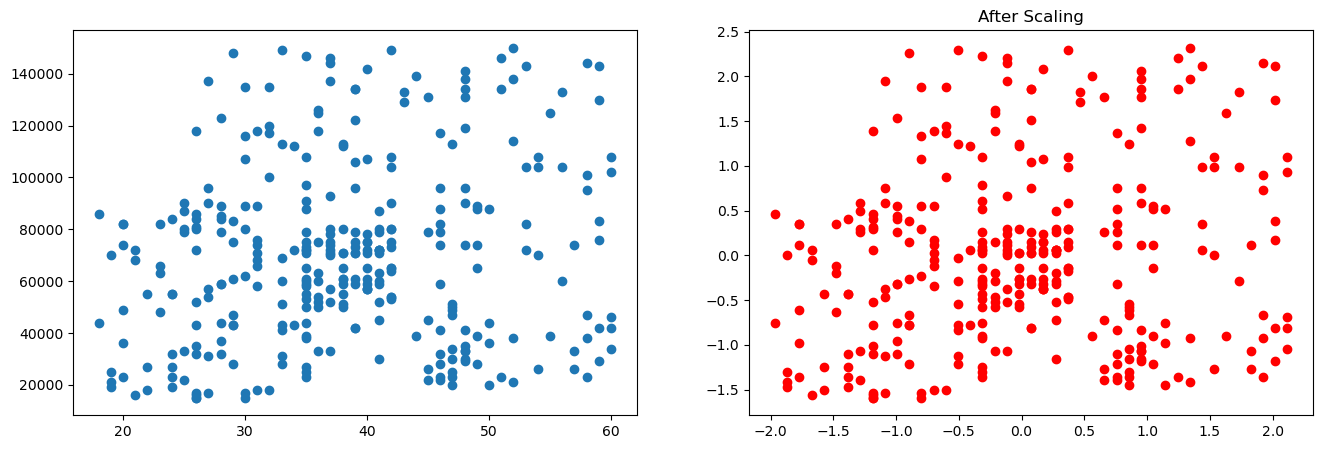

In [21]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize =(16,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
plt.title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
plt.title("After Scaling")
plt.show()


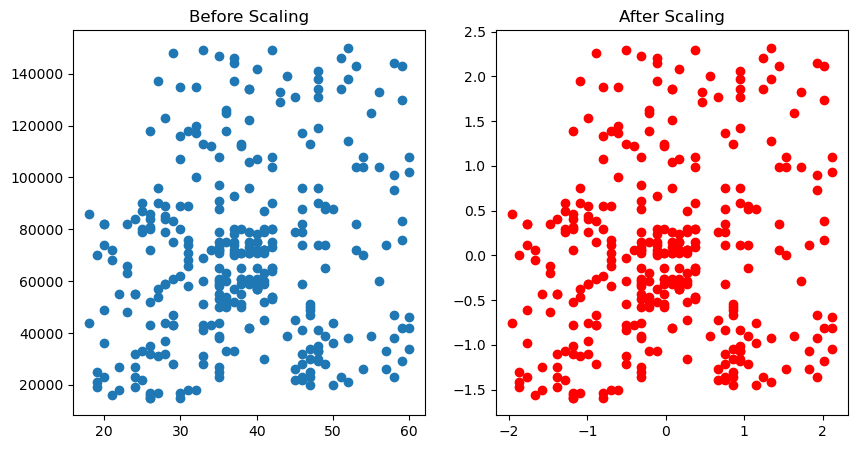

In [22]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize =(10,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After Scaling")
plt.show()


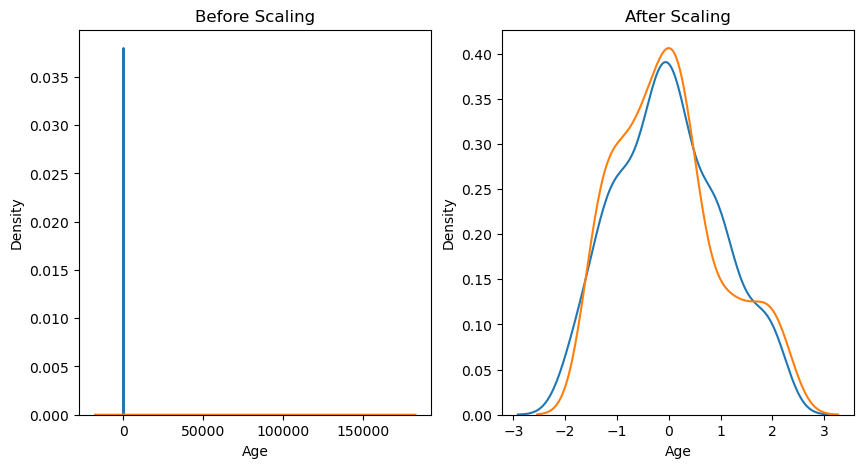

In [23]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize =(10,5))

# Before Scaling 
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax= ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)

# After scaling
sns.kdeplot(X_train_scaled['Age'],ax =ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax =ax2)
ax2.set_title("After Scaling")
plt.show()

## Comparision of Distributions

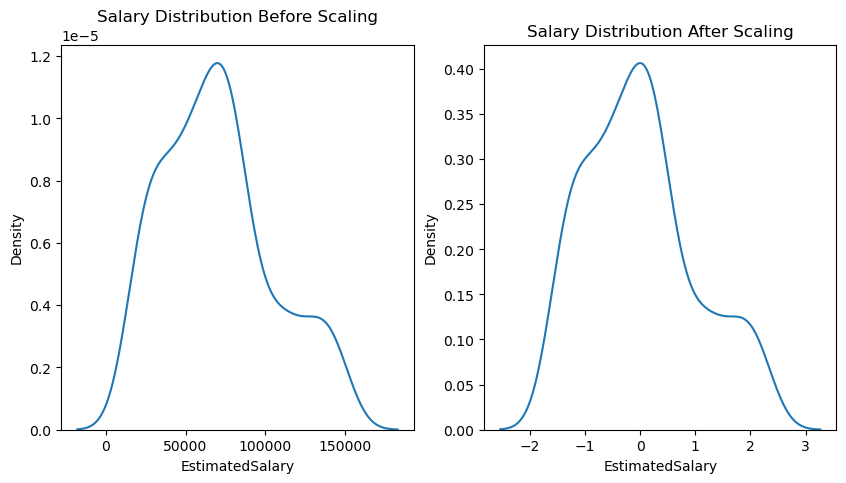

In [24]:
fig, (ax1,ax2)= plt.subplots(ncols = 2,figsize=(10,5))

# Before scaling
ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
# after Scaling
ax2.set_title("Salary Distribution After Scaling")

sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [25]:
# Why scaling is important

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [27]:
lr.fit(x_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [33]:
y_test.shape

(80,)

In [34]:
y_train.shape

(320,)

In [31]:
print("Actual ",accuracy_score(y_test,y_pred))

Actual  0.825


In [32]:
print("Scaled ",accuracy_score(y_test,y_pred_scaled))

Scaled  0.925
